# Texture Feature Extraction Using LBP (library-used)

*** Coded By : Fauzan Firdaus ***

<i style="color:red"> NOTE ::: This code below is just only step to get extraction from images, it hasn't reached the classification step or looking for accuracy. </i>

Before we start everything, let's start with importing library we'll use, such as openCV, numpy, matplotlib, glob, and skimage.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

This 3 images below are dataset for this extraction program.

<img src="Datasets/1.jpg" width="200"> <img src="Datasets/2.jpg" width="200"> <img src="Datasets/3.jpg" width="200">

The next step is defining function for method that we'll execute later. The first function below is <i>load_image( )</i> function. The purpose of this function is to load dataset / image from local computer, and store it to an array. Return value of this function is an image array.

In [2]:
def load_image(arr):
    strr = "Datasets/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

Next function is <i>preprocessing( )</i> function. This function aims to process our dataset become grayscale image.

In [3]:
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

<i>extractLBP( ) </i> is the next function we should define. The purpose of this function is return 2 value. The first value is to return texture extraction as image result. And second value is to return texture extraction as vector result.

In [4]:
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))                   
    hist = hist.astype("float")                         
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

Last function is <i>featureExtraction( )</i>. This function aims to return array as a new array of extracted textures, and its vector. 

In [5]:
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

The next step is to load dataset and store it to an array.

In [6]:
data=[]
data=load_image(data)

After loading the datasets, process the image by turning it into grayscale image.

In [7]:
dataPreprocessed = preprocessing(data)

The final step is to get texture extraction.

In [8]:
dataExtracted,vector = featureExtraction(dataPreprocessed)

Extraction Result


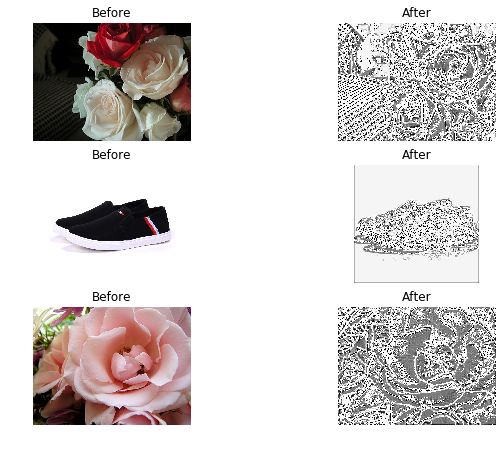

In [9]:
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1],)

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()

After we got an texture extraction of the images, we can see the vector below that shoes image has a bit different value than 2 flower images.

In [10]:
print("Vector of Image 1 :",vector[0])
print()
print("Vector of Image 2 :",vector[1])
print()
print("Vector of Image 3 :",vector[2])

Vector of Image 1 : [0.04298177 0.02610677 0.02003906 0.01395833 0.01042969 0.01027344
 0.01111979 0.01175781 0.01369792 0.01761719 0.0239974  0.03846354
 0.04880208 0.03946615 0.02216146 0.01733073 0.01208333 0.01209635
 0.0100651  0.01091146 0.0133724  0.01683594 0.02207031 0.02566406
 0.09979167 0.40890625]

Vector of Image 2 : [0.0130116  0.00807442 0.006257   0.00361736 0.00255995 0.00207012
 0.00182909 0.0026999  0.00346574 0.00466311 0.00579632 0.01071406
 0.0158981  0.0217644  0.00778869 0.01568429 0.00562916 0.0145083
 0.00538036 0.00612482 0.00717251 0.00967026 0.01323319 0.0116529
 0.64647672 0.15425764]

Vector of Image 3 : [0.02920573 0.01934896 0.01644531 0.01316406 0.01121094 0.01117187
 0.01239583 0.01501302 0.01914062 0.02688802 0.04200521 0.07244792
 0.10053385 0.07191406 0.04106771 0.0280599  0.01910156 0.01514323
 0.01296875 0.01160156 0.011875   0.01291667 0.01574219 0.01643229
 0.034375   0.31983073]
